In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import numpy as np
import cv2
import os


In [19]:
img = image.load_img(r"D:\Projects\Image_neural_net\training\happy\1.jpg")

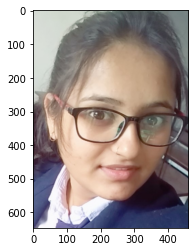

In [20]:
plt.imshow(img)

In [21]:
cv2.imread(r"D:\Projects\Image_neural_net\training\happy\1.jpg").shape

(646, 461, 3)

In [22]:
training = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [23]:
train_dataset = training.flow_from_directory(r'D:/Projects/Image_neural_net/training/',
                                             target_size=(200,200), 
                                             batch_size=3,
                                             class_mode = "binary")
validation_dataset = validation.flow_from_directory(r'D:/Projects/Image_neural_net/validation/',
                                             target_size=(200,200), 
                                             batch_size=3,
                                             class_mode = "binary")

Found 30 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [24]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##1 layer
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##2 layer
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##3 Layer
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')])

In [25]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics = ['accuracy'])

In [26]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 5,
                     epochs = 30,
                     validation_data = validation_dataset)

Train for 5 steps, validate for 3 steps
Epoch 1/30
5/5 [==============================] - 3s 533ms/step - loss: 2.4046 - accuracy: 0.4667 - val_loss: 0.7366 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 2s 387ms/step - loss: 0.7191 - accuracy: 0.6000 - val_loss: 0.7095 - val_accuracy: 0.6250
Epoch 3/30
5/5 [==============================] - 2s 385ms/step - loss: 0.7740 - accuracy: 0.7333 - val_loss: 0.9154 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - 2s 353ms/step - loss: 0.3604 - accuracy: 0.8000 - val_loss: 1.1066 - val_accuracy: 0.3750
Epoch 5/30
5/5 [==============================] - 2s 366ms/step - loss: 0.7169 - accuracy: 0.7333 - val_loss: 0.6461 - val_accuracy: 0.5000
Epoch 6/30
5/5 [==============================] - 2s 359ms/step - loss: 0.5447 - accuracy: 0.7333 - val_loss: 0.8424 - val_accuracy: 0.5000
Epoch 7/30
5/5 [==============================] - 2s 392ms/step - loss: 0.4429 - accuracy: 0.9333 - val_loss: 0.8413 - v

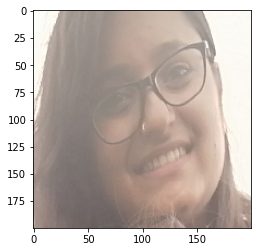

You are happy


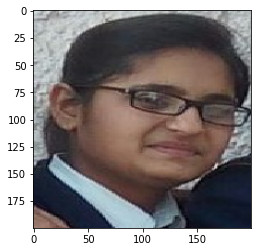

You are not happy


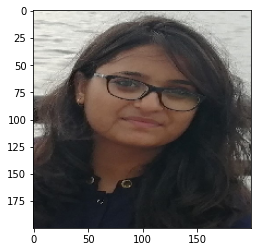

You are happy


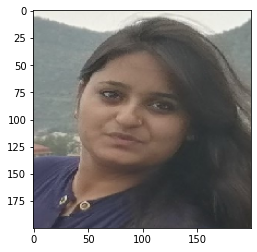

You are not happy


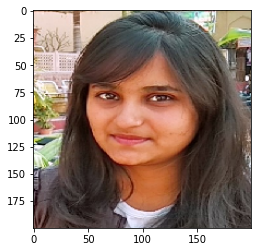

You are happy


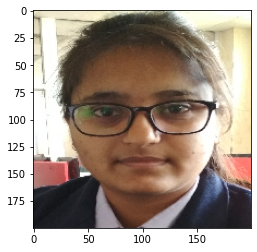

You are happy


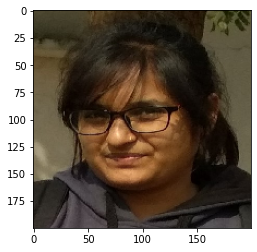

You are happy


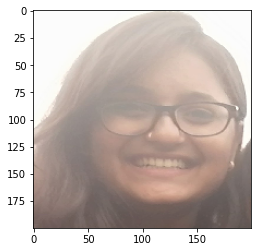

You are happy


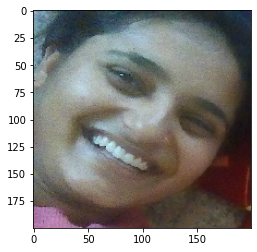

You are not happy


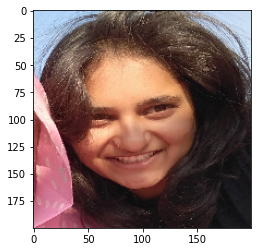

You are happy


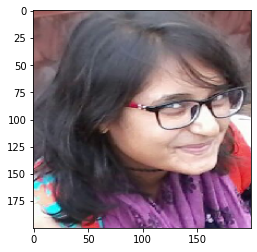

You are not happy


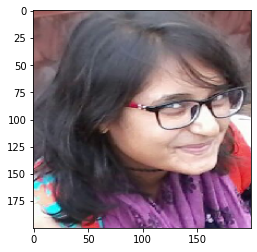

You are not happy


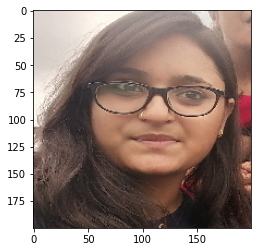

You are not happy


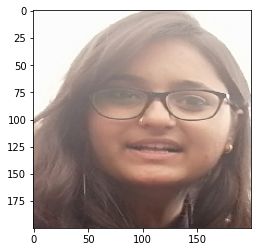

You are not happy


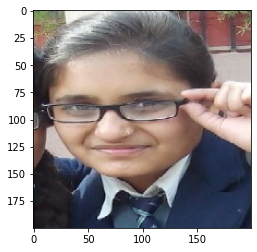

You are not happy


In [27]:
dir_path = "D:/Projects/Image_neural_net/testing"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(200,200,3))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("You are not happy")
    else:
        print("You are happy")